# Assignment #1

Please follow instruction below to complete your assingment. 
You are expected to provide:
- data files
- IPython notebook

Please use code blocks to comment and explain your code.

STUDENT ID: 36285

In [38]:
%matplotlib inline 
import os, sys
import json
import networkx as nx
import random
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb


# Import any other package you may need

## Erdos-Renyi network simulation

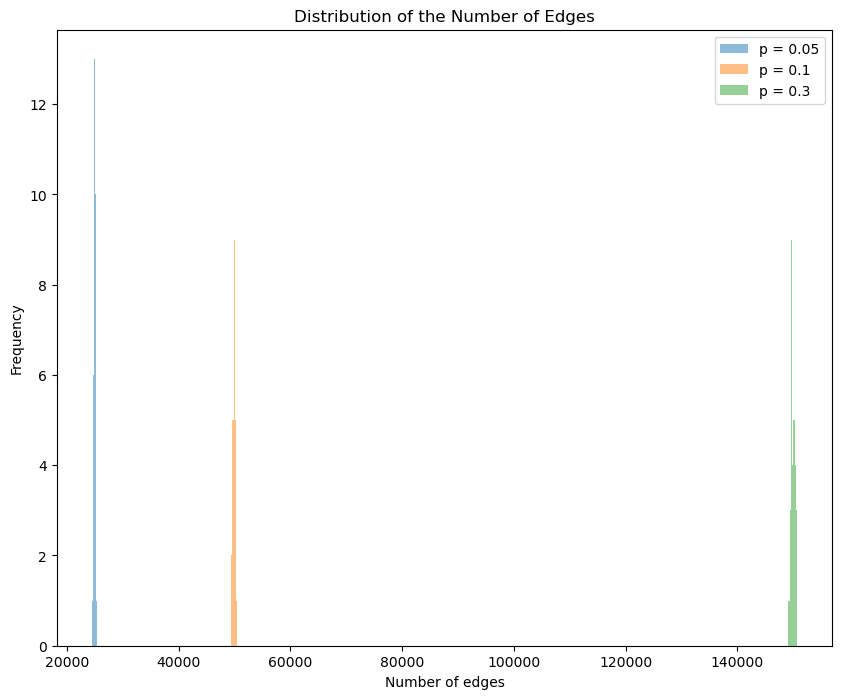

In [19]:
def simulate_erdos_renyi(N, p):
    graph = nx.Graph()
    for current_node in range(1, N+1):
        graph.add_node(current_node)
        for counter in range(1, current_node):
            if random.random() < p or p == 1.0:
                graph.add_edge(current_node, counter)
    #Implement code for ER network generation.
    #Please do not use nx.gnp_random_graph function here.
    #simulate 100 random initializations for p=0.05, p=0.1 and p=0.3
    return graph

#You will need to simulate 100 random initializations for 
#p=0.05, p=0.1 and p=0.3 and 
#plot distributions for number of edges in a single figure.
edge_counts = {0.05: [], 0.1: [], 0.3: []}

plt.figure(figsize=(10, 8))

for prob in edge_counts.keys():
    for sim in range(100):
        G = simulate_erdos_renyi(1000, prob)
        edge_counts[prob].append(G.number_of_edges())
    plt.hist(edge_counts[prob], bins=20, alpha=0.5, label='p = {}'.format(prob))


plt.xlabel('Number of edges')
plt.ylabel('Frequency')
plt.title('Distribution of the Number of Edges')
plt.legend()
plt.show() 


# Network generation and node properties

Request and download dataset for your own social media accounts and analyze using network science methods.

If you are not a frequnt users, you can select 3 networks with different categorical subdomains using the database below.

https://icon.colorado.edu/#!/networks

Please keep the networks smaller than 10.000 nodes.

Explore the different algorithms available on networkx for node and graph level properties.
https://networkx.org/documentation/stable/reference/algorithms/index.html

1) You should cover at least 
- node clustering coefficient, degree, strength
- graph density, largest connected components size, radius

2) Plot degree distribution. Depending on the graph topology either use linear or logarithmic scale.

3) For each edge, plot heatmap for degree of the nodes at each end and discuss whether the network is assortative or disassortative.

### Network analysis

In [ ]:
# Load network
# TUNALI, V , GÜVENOĞLU, E . (2019). Complex Network Analysis Approach to Examining Undergraduate Program Preferences. Bitlis Eren Üniversitesi Fen Bilimleri Dergisi, 8 (1), 176-186. DOI: 10.17798/bitlisfen.448039
filename = "co-preference-edges-weighted.txt"
G = nx.read_weighted_edgelist(filename, delimiter='\t')

# Compute node and graph properties. Keep node properties in the GEXF file and print graph properties here

# Degree
degrees = dict(G.degree())
nx.set_node_attributes(G, degrees, 'degree')

# Clustering coefficient
clustering_coefficients = nx.clustering(G)
nx.set_node_attributes(G, clustering_coefficients, 'clustering')

# Strength 
stengths = {}
for node in G.nodes():
    for edge in G.edges(node, data=True):
        if node not in stengths:
            stengths[node] = 0
        stengths[node] += edge[2].get('weight', 1)
nx.set_node_attributes(G, stengths, 'strength')

# Density 
density = nx.density(G)
nx.set_node_attributes(G, {node: density for node in G.nodes()}, 'density')

# Largest Connected Component Size
largest_cc = max(nx.connected_components(G), key=len)
largest_cc_subgraph = G.subgraph(largest_cc)
largest_cc_size = largest_cc_subgraph.number_of_nodes()
nx.set_node_attributes(G, {node: largest_cc_size for node in G.nodes()}, 'largest_cc_size')

# Radius
radius = nx.radius(largest_cc_subgraph)
nx.set_node_attributes(G, {node: radius for node in G.nodes()}, 'radius')

# Diameter
diameter = nx.diameter(largest_cc_subgraph)
nx.set_node_attributes(G, {node: diameter for node in G.nodes()}, 'diameter')

# Bridges
bridge_list = list(nx.bridges(G))
nx.set_edge_attributes(G, {b: 1 for b in bridge_list}, 'is_bridge')

# Average neighbor degree
avg_neighbor_degree = nx.average_neighbor_degree(G)
nx.set_node_attributes(G, avg_neighbor_degree, 'avg_neighbor_degree')

# Eulerian check
is_eulerian_network = nx.is_eulerian(G)
nx.set_node_attributes(G, {node: is_eulerian_network for node in G.nodes()}, 'is_eulerian')

# Export to Gexf file.
nx.set_node_attributes(G, degrees, 'node_size')
nx.set_node_attributes(G, clustering_coefficients, 'node_color')
nx.write_gexf(G, 'Turkish_HigherEd_Programs.gexf')
print("GEXF file exported as 'Turkish_HigherEd_Programs.gexf'")


GEXF file exported as 'Turkish_HigherEd_Programs.gexf'


### Plot degree distribution

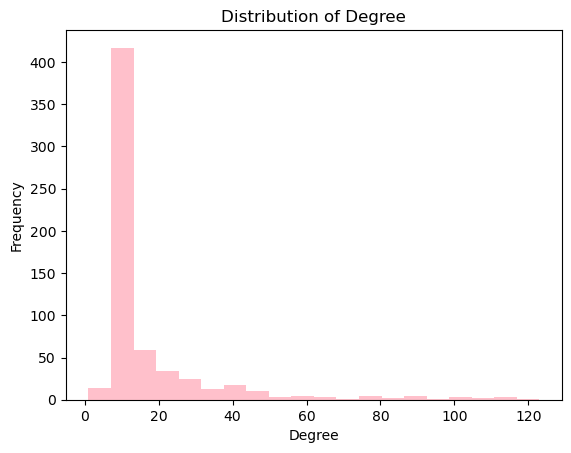

In [66]:
degrees = []
for node in G.nodes():
    degrees.append(G.nodes[node]['degree'])
plt.hist(degrees, bins=20, color="pink")
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Distribution of Degree')
plt.show()

### Assortativeness analysis


In [44]:
assortativity_coefficient = nx.degree_assortativity_coefficient(G)
print("Degree Assortativity Coefficient:", assortativity_coefficient)

if assortativity_coefficient == 0:
    print("The network is neutural.")
elif assortativity_coefficient > 0:
    print("The network is assortative.")
else:
    print("The network is disassortative.")

Degree Assortativity Coefficient: -0.29546042552257457
The network is disassortative.


# Cayley tree

You can find more information about Cayley tree or bethe lattice below

https://en.wikipedia.org/wiki/Bethe_lattice

# of nodes in the tree: 426
# of edges in the tree: 425


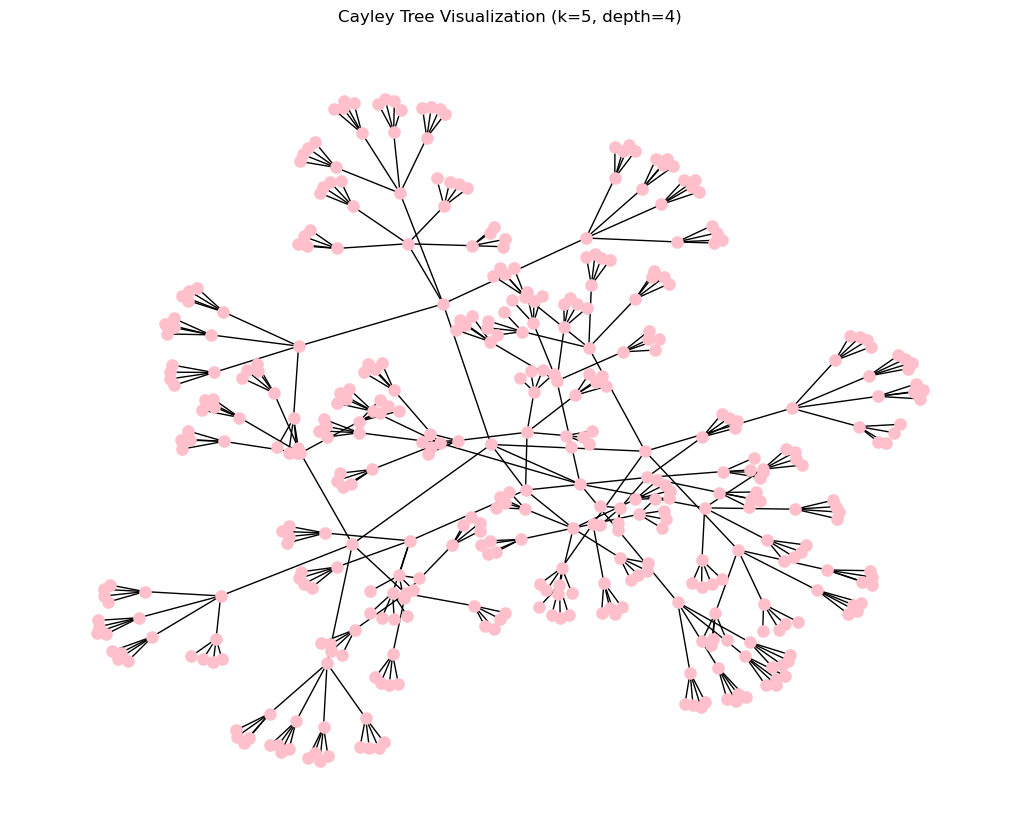

In [ ]:
def generate_cayley_tree_from_root(k, depth):
    G = nx.Graph()
    node_counter = 0
    G.add_node(node_counter)  
    frontier = [(node_counter, 0)]  
    node_counter += 1

    while frontier:
        node, level = frontier.pop(0)
        if level < depth:
            num_children = k if level == 0 else k - 1
            for _ in range(num_children):
                G.add_node(node_counter)
                G.add_edge(node, node_counter)
                frontier.append((node_counter, level + 1))
                node_counter += 1
    return G

k = 5
depth = 4  

tree = generate_cayley_tree_from_root(k, depth)
print("# of nodes in the tree:", tree.number_of_nodes())
print("# of edges in the tree:", tree.number_of_edges())

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(tree, seed=42) 
nx.draw(tree, pos, with_labels=False, node_size=50, node_color="pink", edge_color="black", linewidths=2)
plt.title("Cayley Tree Visualization (k=5, depth=4)")
plt.show()
